__Classifying Iris Flowers with SVM__

__Step 1__: Import Packages

In [50]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm, datasets
from sklearn.decomposition import PCA

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

__Step 2__: Import Data

In [51]:
iris_data = pd.read_csv('iris_data.csv')
iris_data

,sepal-length,sepal-width,petal-length,petal-width,iris_type
0,4.6,3.4,1.4,0.3,Iris-setosa
1,5.0,3.4,1.5,0.2,Iris-setosa
2,4.4,2.9,1.4,0.2,Iris-setosa
3,4.9,3.1,1.5,0.1,Iris-setosa
4,5.4,3.7,1.5,0.2,Iris-setosa
5,4.8,3.4,1.6,0.2,Iris-setosa
6,4.8,3.0,1.4,0.1,Iris-setosa
7,4.3,3.0,1.1,0.1,Iris-setosa
8,5.8,4.0,1.2,0.2,Iris-setosa
9,5.7,4.4,1.5,0.4,Iris-setosa


__Step 4__: Prepare the Data

In [52]:
flower_sizes = iris_data[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']].values

i = 0
tam = len(iris_data['iris_type'])
type_label = np.zeros((tam,), dtype=int)
for type in iris_data['iris_type']:
    if type == 'Iris-setosa':
        type_label[i] = 0
    elif type == 'Iris-versicolor':
        type_label[i] = 1
    else:
        type_label[i] = 2
    i += 1
type_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

__Step 4__: Fit the Model

In [57]:
model = svm.SVC()
model.fit(flower_sizes, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

__Step 5__: Predict a new case

In [59]:
# Function to predict a new case
def iris_type(sl, sw, pl, pw):
    if(model.predict([[sl, sw, pl, pw]]))==0:
        print('It\'s an Iris Setosa.')
    elif(model.predict([[sl, sw, pl, pw]]))==1:
        print('It\'s an Iris Versicolor.')
    else:
        print('It\'s an Iris Virginica.')

In [60]:
# Predicting a new case
iris_type(5.4,3.9,1.7,0.4)

It's an Iris Setosa.


__Step 6__: Visualizing how the algorithm works

In [64]:
# Applying a dimensionality reduction to the features for visualize the data
pca = PCA(n_components=2).fit(flower_sizes)
pca_2d = pca.transform(flower_sizes)

In [65]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


In [66]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(pca_2d, type_label) for clf in models)



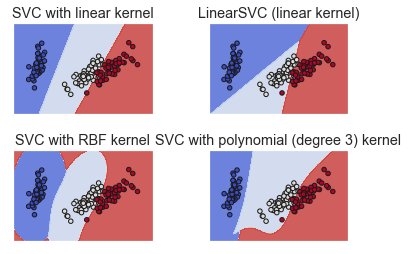

In [67]:
# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = pca_2d[:, 0], pca_2d[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=type_label, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()